In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

import pygimli as pg
import pygimli.meshtools as mt
from pygimli.physics import ert
from pygimli.physics import TravelTimeManager

In [2]:
def createGradientModel2D(data, mesh, vTop, vBot, logic, x1, y1, x2, y2):

    p = np.polyfit(pg.x(data), pg.y(data), deg=1)  # slope-intercept form
    n = np.asarray([-p[0], 1.0])  # normal vector
    nLen = np.sqrt(np.dot(n, n))

    x = pg.x(mesh.cellCenters())
    x = np.array(x[logic])
    z = pg.y(mesh.cellCenters())
    z = np.array(z[logic])

    zmin = np.interp(x, x1, y1)
    zmax = np.interp(x, x2, y2)


    z = (z - zmin)/(zmax - zmin)
    print(z)
    pos = np.column_stack((x, z))


    return np.interp(z, [0.0, 1.0], [vTop, vBot])

## Model structure
Can be run separated

(-30.0, 10.0)

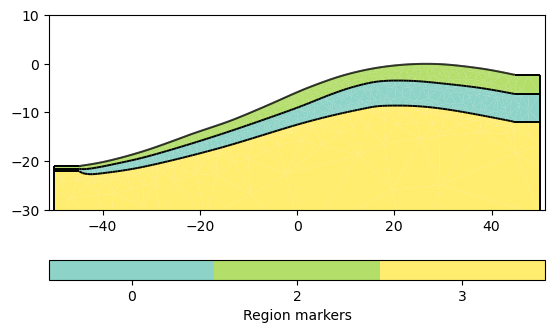

In [3]:
%matplotlib inline

from numpy import genfromtxt
my_data = genfromtxt('first.csv', delimiter=',')
minusdepth = np.max(my_data[:,1])
my_data[:,1] = my_data[:,1] -minusdepth

my_data2 = genfromtxt('second.csv', delimiter=',')
my_data2[:,1] = my_data2[:,1] -minusdepth - 0.5

my_data3 = genfromtxt('third.csv', delimiter=',')
my_data3[:,1] = my_data3[:,1] -minusdepth -1

my_data3r = my_data3.copy()
my_data3r[:,0] = np.flip(my_data3[:,0])
my_data3r[:,1] = np.flip(my_data3[:,1])

layer1 = mt.createPolygon(np.vstack(([-50,my_data[0,1]],my_data,[50,my_data[-1,1]])),
                          isClosed=False, marker=1, area=1, boundaryMarker=-1,interpolate='linear')

layer3 = mt.createPolygon([ [-50,my_data[0,1]],[-50,-50], [50, -50], [50,my_data[-1,1]]],
                          isClosed=False, marker=1, area=1, boundaryMarker=1)

layer2 = mt.createPolygon(np.vstack(([-50,my_data2[0,1]],my_data2,[50,my_data2[-1,1]],[50,my_data3r[0,1]],my_data3r,[-50,my_data3r[-1,1]]))                  
                          ,isClosed=True, marker=2)

layer4 = mt.createPolygon( np.vstack(([50, -50],[50,my_data3r[0,1]] ,my_data3r,[-50,my_data3r[-1,1]],
                           [-50,-50])),isClosed=True, marker=3)

geom = layer1 + layer3 + layer2 + layer4
ax, _ = pg.show(geom)
ax.set_xlim([-51,51])
ax.set_ylim([-30,10])
# ax.spines['bottom'].set_linewidth(0)
# ax.spines['left'].set_linewidth(0)
# ax.spines['right'].set_linewidth(0)
# ax.spines['top'].set_linewidth(0)

In [4]:
my_data2

array([[-44.8       , -21.60976127],
       [-44.32556327, -21.64222542],
       [-43.81007449, -21.6553085 ],
       [-43.29513177, -21.62646633],
       [-42.78054471, -21.57031758],
       [-42.26614086, -21.5001018 ],
       [-41.75186634, -21.41995635],
       [-41.23766727, -21.3340186 ],
       [-40.72355082, -21.2417369 ],
       [-40.20949006, -21.14517993],
       [-39.69547959, -21.04476142],
       [-39.18150325, -20.94172258],
       [-38.66756284, -20.8359255 ],
       [-38.15364757, -20.72819765],
       [-37.63975027, -20.61909068],
       [-37.12585476, -20.5098458 ],
       [-36.61193949, -20.40211795],
       [-36.0980368 , -20.29342472],
       [-35.58413231, -20.1848694 ],
       [-35.07025117, -20.07452123],
       [-34.55640237, -19.96169063],
       [-34.04257691, -19.84706719],
       [-33.52879277, -19.72927176],
       [-33.01503917, -19.60913183],
       [-32.50134125, -19.48471663],
       [-31.98768284, -19.35726736],
       [-31.47406935, -19.22637029],
 

In [5]:
my_data3

array([[-44.8       , -22.10976127],
       [-44.12027116, -22.4640981 ],
       [-43.60331125, -22.59013113],
       [-43.08712013, -22.65713781],
       [-42.5712721 , -22.69780329],
       [-42.05597552, -22.69612979],
       [-41.54108668, -22.66315025],
       [-41.02642059, -22.61306963],
       [-40.51188022, -22.55333516],
       [-39.99739016, -22.48973916],
       [-39.48289111, -22.42683272],
       [-38.96840643, -22.36282298],
       [-38.45392714, -22.29839951],
       [-37.93947659, -22.23176944],
       [-37.42505119, -22.16320861],
       [-36.91066172, -22.09188953],
       [-36.39630816, -22.01781222],
       [-35.88198695, -21.94125248],
       [-35.36770704, -21.86152078],
       [-34.85347204, -21.77834127],
       [-34.33928015, -21.69185187],
       [-33.82512958, -21.6021905 ],
       [-33.31101493, -21.50977088],
       [-32.79695776, -21.41293808],
       [-32.2829419 , -21.31293331],
       [-31.76896736, -21.20975656],
       [-31.25504311, -21.10271827],
 

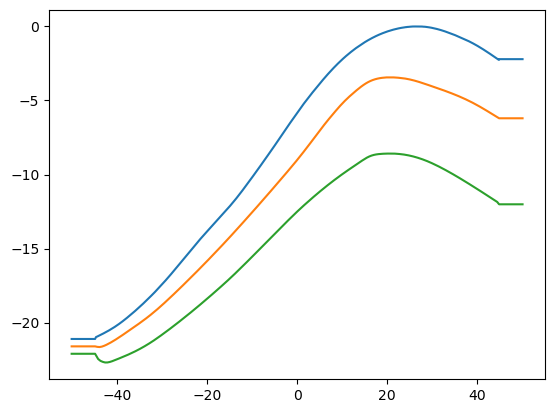

In [6]:
my_data = np.vstack(([-50,my_data[0,1]],my_data,[50,my_data[-1,1]]))

my_data2 = np.vstack(([-50,my_data2[0,1]],my_data2,[50,my_data2[-1,1]]))
                     
my_data3 = np.vstack(([-50,my_data3[0,1]],my_data3,[50,my_data3[-1,1]]))  
                     
#pg.show(layer1)
xb = my_data[:,0]
yb = my_data[:,1]

plt.plot(xb,yb)

x1 = my_data2[:,0]
y1 = my_data2[:,1]

plt.plot(x1,y1)
# print(x1)
# print(y1)
# plt.plot(x1,y1)
x2 = my_data3[:,0]
y2 = my_data3[:,1]
plt.plot(x2,y2)
# print(x2)
# print(y2)
# np.save('x1',np.array(x1))
# np.save('y1',np.array(y1))
# np.save('x2',np.array(x2))
# np.save('y2',np.array(y2))

In [7]:
numberGeophones = 90
sensors = np.linspace(-44.5, 44.5, numberGeophones)
scheme = pg.physics.traveltime.createRAData(sensors,shotDistance=12)


scheme = pg.DataContainer()
scheme.registerSensorIndex('s')
scheme.registerSensorIndex('g')

if isinstance(sensors, np.ndarray):
    if len(sensors.shape) == 1:
        for x in sensors:
            scheme.createSensor([x, 0.0, 0.0])
    else:
        scheme.setSensorPositions(sensors)

else:
    scheme.setSensorPositions(sensors)

S, G = [], []
for s in [0,6,12,18,24,30,36,42,48,54,60,66,72,78,84,89]:  #[range(0, data.sensorCount(), shotDistance)]:
    for g in range(scheme.sensorCount()):
        if s is not g:
            S.append(s)
            G.append(g)

scheme.resize(len(S))
scheme.set('s', S)
scheme.set('g', G)
scheme.set('valid', np.abs(np.sign(scheme('g') - scheme('s'))))


print(scheme)

Data: Sensors: 90 data: 1424, nonzero entries: ['g', 's', 'valid']


In [8]:
print(range(0, 90, 5))

range(0, 90, 5)


In [9]:
# Adapt sensor positions to slope
pos = np.zeros((90,2))
               
i = 0
for x in sensors:
    minusx = np.abs(my_data[:,0]-x)
    index = np.where(minusx== np.amin(minusx))
    new_x = my_data[index,0]
    new_y = my_data[index,1]
    pos[i, 0] = new_x
    pos[i, 1] = new_y
    i=i+1

scheme.setSensors(pos)


(-45.5, 45.5)

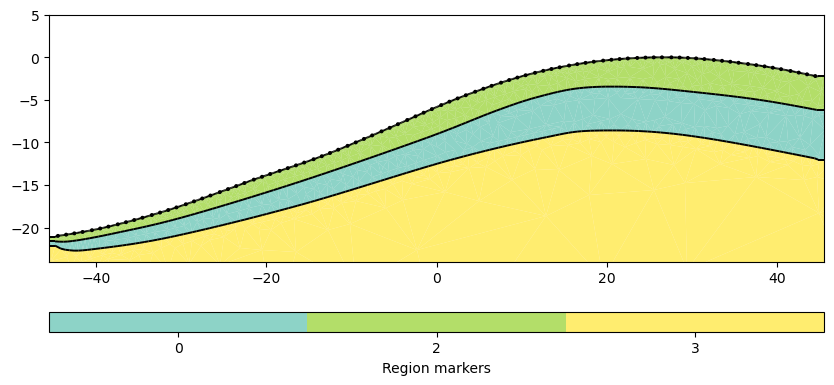

In [10]:
fig = plt.figure(figsize=[10,6])

ax = fig.add_subplot(1,1,1)
ax,_ = pg.show(geom,ax=ax)
pg.viewer.mpl.drawSensors(ax, scheme.sensors(), diam=0.3,
                         facecolor='black', edgecolor='black')
ax.set_ylim([-24,5])
ax.set_xlim([-45.5,45.5])


## Seismic travel time

In [11]:
for p in scheme.sensors():
    geom.createNode(p)
    geom.createNode(p - [0, 0.1])
    #geom.createNode(p - [0, 0.2])
    
mesh = mt.createMesh(geom, quality=32)

mgr = TravelTimeManager()
pg.show(mesh)
mesh.save('synmesh')

1

In [12]:
model = pg.utils.generateGeostatisticalModel(mesh, I=[20, 2])
ax, cb = pg.show(mesh, model)

In [13]:
model = (model-np.mean(model))/(np.std(model))*0.1

# model = (model-np.min(model))/(np.max(model)-np.min(model))
# model = ((model-np.min(model))/(np.max(model)-np.min(model))-0.5)*2

In [14]:
ax, cb = pg.show(mesh, np.exp(model))

In [15]:
## first layer position

xtemp = xb
ytemp = yb
               

In [16]:
xx = np.arange(-50,50+0.01,0.01)

data = pg.load('ttData')
meshmarker = np.array(mesh.cellMarkers())

times1 = createGradientModel2D(data, mesh, 0.8, 1.2, meshmarker==2,xtemp,ytemp,x1,y1)
Sat1 = createGradientModel2D(data, mesh, 0.4, 0.7, meshmarker==2,xtemp,ytemp,x1,y1)
porosity1 = createGradientModel2D(data, mesh, 0.42, 0.32, meshmarker==2,xtemp,ytemp,x1,y1)
VV1 = createGradientModel2D(data, mesh, 800, 1200, meshmarker==2,xtemp,ytemp,x1,y1)



yy = np.interp(xx, x1, y1)
yy2 = np.interp(xx, x2, y2)

times2 = createGradientModel2D(data, mesh, 0.7, 1.3, meshmarker==0,xx,yy,xx,yy2)
Sat2 = createGradientModel2D(data, mesh, 0.7, 1, meshmarker==0,xx,yy,xx,yy2)
porosity2 = createGradientModel2D(data, mesh, 0.32, 0.04, meshmarker==0,xx,yy,xx,yy2)
VV2 = createGradientModel2D(data, mesh, 2000, 4000, meshmarker==0,xx,yy,xx,yy2)

Sat3 = pg.solver.parseArgToArray([[0, 1], [2, 1], [3,1]],
                                      mesh.cellCount(), mesh)

porosity3 = pg.solver.parseArgToArray([[0, 0.05], [2, 0.05], [3,0.05]],
                                      mesh.cellCount(), mesh)

VV3 = pg.solver.parseArgToArray([[0, 5000], [2, 5000], [3,5000]],
                                      mesh.cellCount(), mesh)

rhos = pg.solver.parseArgToArray([[0, 3000], [2, 3000], [3,2400]],
                                      mesh.cellCount(), mesh)

meshmarker = np.array(mesh.cellMarkers())
porosity = porosity3.array()
porosity[meshmarker==2]= np.exp(model[meshmarker==2])*0.36/times1
po2 = np.exp(model[meshmarker==0])*0.18/times2
po2[po2>0.25] = 0.25
porosity[meshmarker==0]= po2
porosity[meshmarker==3]= porosity3[meshmarker==3]
porosity[porosity<0.01]=0.01
porosity[porosity>0.5]=0.5

rhos = rhos.array()
rhos[meshmarker==2]= np.exp(model[meshmarker==2]*2)*200*times1
rhos[meshmarker==0]= np.exp(model[meshmarker==0]*2)*1000*times2
rhos[meshmarker==3]= rhos[meshmarker==3]

V = VV3.array()
V[meshmarker==2]= np.exp(model[meshmarker==2])*800*times1
V[meshmarker==0]= np.exp(model[meshmarker==0])*2400*times2
V[meshmarker==3]=VV3[meshmarker==3]

Sat = Sat3.array()
Sat[meshmarker==2]=Sat1
Sat[meshmarker==0]=Sat2
Sat[meshmarker==3]=Sat3[meshmarker==3]
Sat[Sat>1]=1
Sat[Sat<0]=0

[0.08566905 0.05470704 0.66666667 ... 0.89075981 0.72409314 0.27180072]
[0.08566905 0.05470704 0.66666667 ... 0.89075981 0.72409314 0.27180072]
[0.08566905 0.05470704 0.66666667 ... 0.89075981 0.72409314 0.27180072]
[0.08566905 0.05470704 0.66666667 ... 0.89075981 0.72409314 0.27180072]
[0.66666667 0.19188719 0.25004982 ... 0.50373124 0.28253938 0.25041209]
[0.66666667 0.19188719 0.25004982 ... 0.50373124 0.28253938 0.25041209]
[0.66666667 0.19188719 0.25004982 ... 0.50373124 0.28253938 0.25041209]
[0.66666667 0.19188719 0.25004982 ... 0.50373124 0.28253938 0.25041209]


In [17]:
plt.plot(xx,yy)
plt.plot(xx,yy2)
plt.plot(x2, y2)


In [18]:
ax, cb = pg.show(mesh, porosity,cMap='jet')
ax, cb = pg.show(mesh, V,logScale = True,cMap='jet')
ax, cb = pg.show(mesh,Sat,cMap='jet')
np.save('synporosity',porosity)
np.save('synV',V)
np.save('synSat',Sat)
np.save('synrhos',rhos)
print(np.max(porosity[meshmarker==0]),np.min(porosity[meshmarker==0]))
print(np.max(porosity[meshmarker==2]),np.min(porosity[meshmarker==2]))

print(np.max(V[meshmarker==0]),np.min(V[meshmarker==0]))
print(np.max(V[meshmarker==2]),np.min(V[meshmarker==2]))

0.25 0.11744163728098135
0.5 0.2420255024683932
3213.398442027011 1405.2083269899226
1130.7720359899643 523.600941557491


In [19]:
from scipy.interpolate import griddata
xyzpos = np.zeros((mesh.cellCount(),3))
for c in mesh.cells():
    xyzpos[c.id(),:] = c.center().array()
    
xx1,yy1= np.mgrid[20:0+1:1j, -23:0:50j]
grid_z1 = griddata(xyzpos[:,0:2], porosity, (xx1, yy1), method='linear')
plt.figure(figsize=[2,4])
plt.scatter(grid_z1[0],yy1[0])
plt.xlabel('Porosity (-)')
plt.ylabel('Elevation (m)')

xx1,yy1= np.mgrid[20:0+1:1j, -23:0:50j]
grid_z1 = griddata(xyzpos[:,0:2], V, (xx1, yy1), method='linear')
plt.figure(3)
plt.scatter(grid_z1[0],yy1[0])

xx1,yy1= np.mgrid[20:0+1:1j, -23:0:50j]
grid_z1 = griddata(xyzpos[:,0:2], Sat, (xx1, yy1), method='linear')
plt.figure(4)
plt.scatter(grid_z1[0],yy1[0])

In [20]:
#V = pg.solver.parseArgToArray([[2, 1000], [0, 1000], [3, 1000]], mesh.cellCount(), mesh)

datasrt = mgr.simulate(slowness=1.0 / V, scheme=scheme, mesh=mesh,
                    noiseLevel=0.01, noiseAbs=0, seed=1334
                    ,verbose=True)

mgr.showData(datasrt)

fig, ax = pg.plt.subplots()
pg.physics.traveltime.drawFirstPicks(ax, datasrt)

# datasrt.save('ttData')

16/11/22 - 14:26:04 - pyGIMLi - INFO - Creating refined mesh (secnodes: 2) to solve forward task.


## generate ERT data
This one can be seperated from Seismic


In [21]:
## adjust resistivity value


## first layer position

xtemp = xb
ytemp = yb

mesh = pg.load('synmesh.bms')
xx = np.arange(-50,50+0.01,0.01)

data = pg.load('ttData')
meshmarker = np.array(mesh.cellMarkers())

times1 = createGradientModel2D(data, mesh, 0.8, 1.2, meshmarker==2,xtemp,ytemp,x1,y1)
yy = np.interp(xx, x1, y1)
yy2 = np.interp(xx, x2, y2)

times2 = createGradientModel2D(data, mesh, 0.7, 1.3, meshmarker==0,xx,yy,xx,yy2)


Sat = np.load('synSat.npy')
rhos2 = np.load('synrhos.npy')

rhos = rhos2.copy()
rhos[meshmarker==2]= (1/(rhos2[meshmarker==2]/(200*times1)))*200*times1
rhos[meshmarker==0]= (1/(rhos2[meshmarker==0]/(1000*times2)))*1000*times2
rhos[meshmarker==3]= rhos[meshmarker==3]
print(np.max(rhos[meshmarker==2]),np.min(rhos[meshmarker==2]),np.mean(rhos[meshmarker==2]))
print(np.max(rhos[meshmarker==0]),np.min(rhos[meshmarker==0]),np.mean(rhos[meshmarker==0]))
sigma_sur = rhos2.copy()

sigma_sur[meshmarker==2] = 1/(rhos[meshmarker==2]*4)
sigma_sur[meshmarker==0] = 0
sigma_sur[meshmarker==3] = 0

rhos[meshmarker==2] = 1/(1/rhos[meshmarker==2] - sigma_sur[meshmarker==2])

[0.08566905 0.05470704 0.66666667 ... 0.89075981 0.72409314 0.27180072]
[0.66666667 0.19188719 0.25004982 ... 0.50373124 0.28253938 0.25041209]
378.5287643725021 99.42580199000083 172.0630290646097
1866.6592338873681 550.6465244110304 1113.6013584731443


In [22]:
rhos[meshmarker==2]

array([202.29686337, 205.09751496, 307.27458736, ..., 363.87897979,
       296.47664625, 274.38994654])

742.6815542597176
2400.0
873.8083256031393


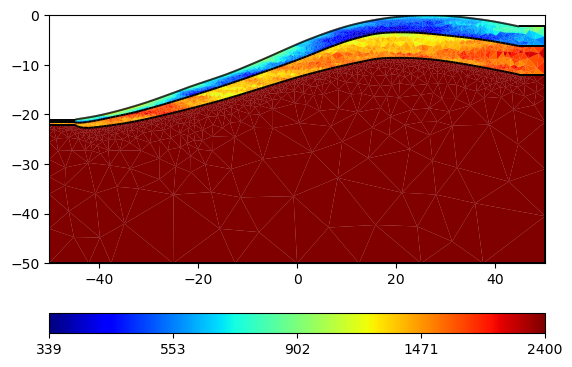

In [23]:
%matplotlib inline
import petrorelationship
from scipy.interpolate import griddata
n_model = pg.solver.parseArgToArray([[2, 2.2], [0, 1.8], [3, 2.5]],
                                      mesh.cellCount(), mesh)

# Sat = pg.solver.parseArgToArray([[0, 0.5], [2, 0.9], [3, 1]],
#                                       mesh.cellCount(), mesh)
mr = petrorelationship.Archierhos(rhos = rhos, a=1.0, Sat=Sat, n=n_model,sigma_sur=sigma_sur)

ax, cb = pg.show(mesh, mr ,cMap='jet',logScale = True)
print(mr[0])
print(mr[4])
print(mr[1005])
# xx1,yy1= np.mgrid[20:0+1:1j, -23:0:50j]
# grid_z1 = griddata(xyzpos[:,0:2], mr, (xx1, yy1), method='linear')
# plt.figure(3)
# plt.scatter(grid_z1[0],yy1[0])
np.save('synrhos2',rhos)
np.save('synrhosmodel',mr)

Data: Sensors: 90 data: 1305, nonzero entries: ['a', 'b', 'm', 'n', 'valid']


(<AxesSubplot:>, <matplotlib.colorbar.Colorbar at 0x23296d5cdc0>)

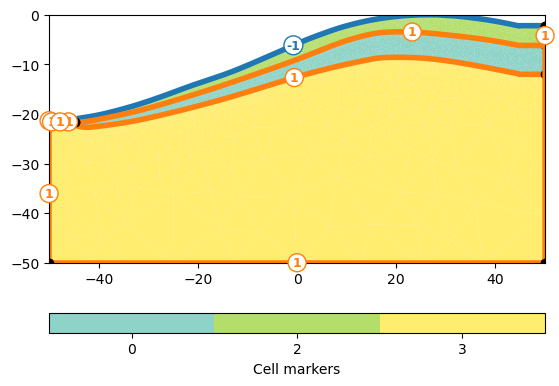

In [24]:
schemeert = ert.createData(elecs=scheme.sensors(),schemeName='wa')
print(schemeert)

# marker_ert = np.ones(mesh.cellCount())*2
# mesh.setCellMarkers(marker_ert)
pg.show(mesh,markers=True)

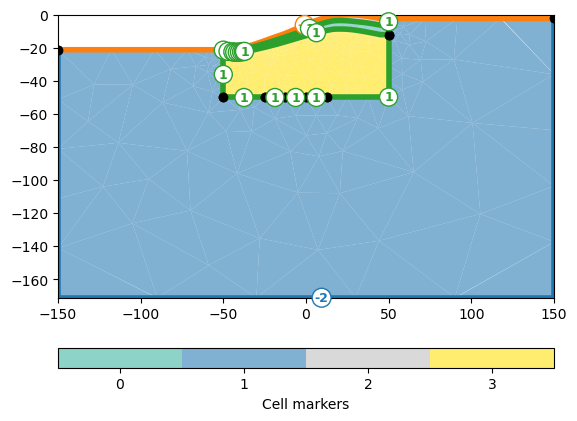

In [25]:
grid = pg.meshtools.appendTriangleBoundary(mesh, marker=1,
                                          xbound=100, ybound=100)
ax,_ = pg.show(grid,markers=True)
# ax.set_ylim([-20,8])
# ax.set_xlim([-50,50])

In [26]:
# #dataert= pg.load('ertdata')
# mesh2 = pg.meshtools.createParaMesh(schemeert, paraDX=0.2)
# ax,_ = pg.show(mesh2)
# pg.viewer.mpl.drawSensors(ax, scheme.sensors(), diam=0.3,
#                          facecolor='black', edgecolor='black')
# ax.set_ylim([-30,10])
# ax.set_xlim([-40,40])
# mr = pg.solver.parseArgToArray([[2, 100],[1, 100]], mesh.cellCount(), mesh)
# dataert = ert.simulate(mesh, scheme=schemeert, res=mr, noiseLevel=0,
#                     noiseAbs=0,seed=1001)
# ert.show(dataert)

16/11/22 - 14:26:13 - pyGIMLi - INFO - Calculate geometric factors.


(<AxesSubplot:>, <matplotlib.colorbar.Colorbar at 0x232972d0a30>)

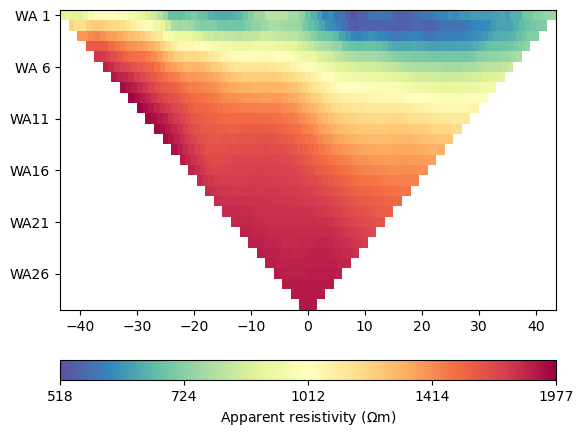

In [27]:
#mr = pg.solver.parseArgToArray([[2, 1000],[0, 1000],[3, 1000],[1, 1000]],grid.cellCount(), grid)
dataert = ert.simulate(mesh, scheme=schemeert, res=mr, noiseLevel=0,
                    noiseAbs=0,seed=1001)
ert.show(dataert)
# dataert.save('ertdata')

In [28]:
# newk = ert.createGeometricFactors(dataert, numerical=True)
# ert.show(dataert)
# ert.show(dataert,abs(dataert['rhoa']*newk/dataert['k']))
# ert.show(dataert,newk/dataert['k'])

16/11/22 - 14:26:22 - pyGIMLi - INFO - Found 2 regions.
16/11/22 - 14:26:22 - pyGIMLi - INFO - Region with smallest marker (1) set to background
16/11/22 - 14:26:22 - pyGIMLi - INFO - Creating forward mesh from region infos.
16/11/22 - 14:26:22 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.


(<AxesSubplot:>, <matplotlib.colorbar.Colorbar at 0x232c93a15e0>)

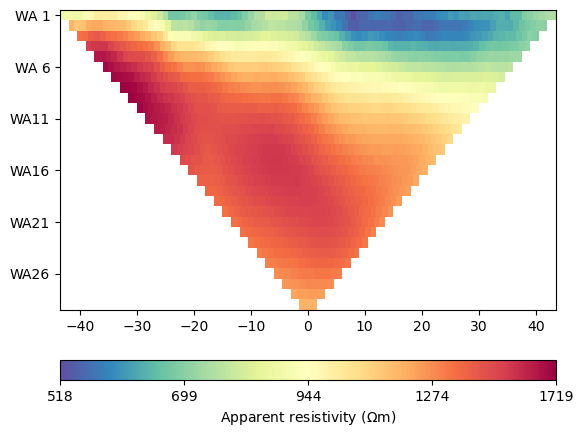

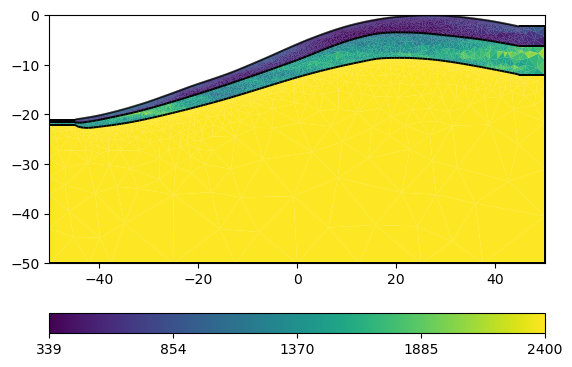

In [29]:

# mr = pg.solver.parseArgToArray([[2, 100],[0, 100],[3, 100]],mesh.cellCount(), mesh)

gridmarker = np.array(grid.cellMarkers())
marker_ert = gridmarker.copy()
marker_ert[gridmarker==0] = 2
marker_ert[gridmarker==3] = 2

grid.setCellMarkers(marker_ert)

fob = ert.ERTModelling()
fob.setData(dataert)
fob.setMesh(grid)
dr = fob.response(mr)

ert.show(dataert,dr)
pg.show(fob.paraDomain,mr)

In [30]:
schemeert = ert.createData(elecs=scheme.sensors(),schemeName='wa')

dataert = ert.simulate(mesh, scheme=schemeert, res=mr, noiseLevel=0,
                    noiseAbs=0,seed=1001)

fob = ert.ERTModelling()
fob.setData(dataert)
fob.setMesh(grid)
fob.createJacobian(mr)


16/11/22 - 14:27:11 - pyGIMLi - INFO - Calculate geometric factors.
16/11/22 - 14:27:19 - pyGIMLi - INFO - Found 2 regions.
16/11/22 - 14:27:19 - pyGIMLi - INFO - Region with smallest marker (1) set to background
16/11/22 - 14:27:19 - pyGIMLi - INFO - Creating forward mesh from region infos.
16/11/22 - 14:27:19 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.


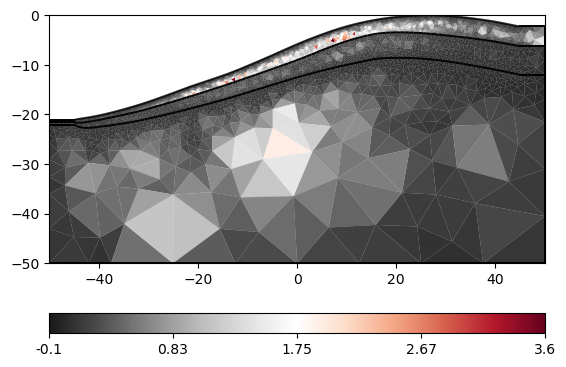

In [31]:
sens = fob.jacobian()
sens = np.sum(sens,axis=0)
pg.show(mesh,sens,cMap="RdGy_r")
normsens = pg.utils.logDropTol(sens/mesh.cellSizes(), 8e-4)
# normsens /= np.max(normsens)

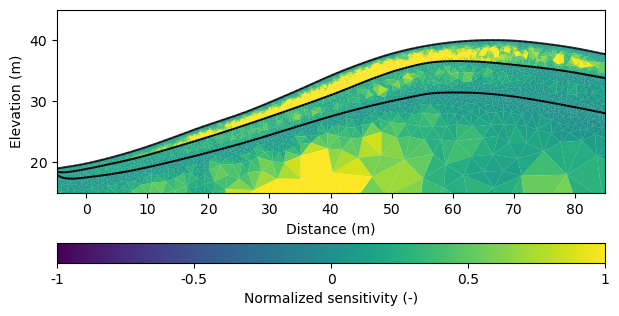

In [32]:
fig = plt.figure(figsize=[6,3])


ax1 = fig.add_subplot(1,1,1)
pg.show(mesh,sens, cMin=-1, cMax=1,label='Normalized sensitivity (-)', 
        ax = ax1,xlabel="Distance (m)", ylabel="Elevation (m)",)

ax1.set_xlim([-44.8,45])
ax1.set_ylim([-25,5])
ax1.set_yticks([-20,-10, 0]);
ax1.set_yticklabels([-20 + 40,-10 + 40, 0 + 40]);
ax1.set_xticks([-40,-30,-20,-10, 0,10,20,30,40]);
ax1.set_xticklabels([0,10,20,30,40,50,60,70,80]);

fig.tight_layout(pad=0.01)

16/11/22 - 14:28:12 - pyGIMLi - INFO - Calculate geometric factors.
16/11/22 - 14:28:21 - pyGIMLi - INFO - Found 2 regions.
16/11/22 - 14:28:21 - pyGIMLi - INFO - Region with smallest marker (1) set to background
16/11/22 - 14:28:21 - pyGIMLi - INFO - Creating forward mesh from region infos.
16/11/22 - 14:28:21 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.


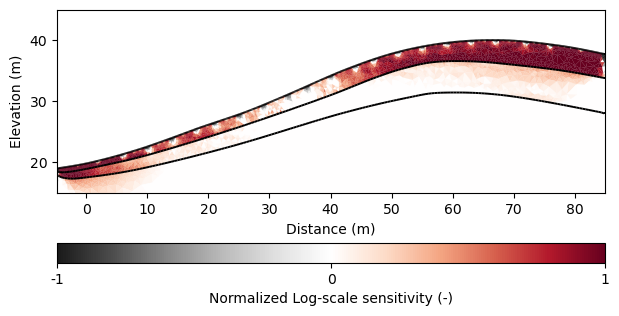

In [33]:
schemeert = ert.createData(elecs=scheme.sensors(),schemeName='dd')
dataert = ert.simulate(mesh, scheme=schemeert, res=mr, noiseLevel=0,
                    noiseAbs=0,seed=1001)
fob = ert.ERTModelling()
fob.setData(dataert)
fob.setMesh(grid)
fob.createJacobian(mr)
sens = fob.jacobian()
sens = np.mean(sens,axis=0)
normsens = pg.utils.logDropTol(sens/mesh.cellSizes(), 8e-4)
# normsens /= np.max(normsens)


fig = plt.figure(figsize=[6,3])
ax1 = fig.add_subplot(1,1,1)
pg.show(mesh,normsens,cMap="RdGy_r", nLevs=3, cMin=-1, cMax=1,label='Normalized Log-scale sensitivity (-)', 
        ax = ax1,xlabel="Distance (m)", ylabel="Elevation (m)")
ax1.set_xlim([-44.8,45])
ax1.set_ylim([-25,5])
ax1.set_yticks([-20,-10, 0]);
ax1.set_yticklabels([-20 + 40,-10 + 40, 0 + 40]);
ax1.set_xticks([-40,-30,-20,-10, 0,10,20,30,40]);
ax1.set_xticklabels([0,10,20,30,40,50,60,70,80]);

fig.tight_layout(pad=0.01)

In [34]:
dr *= 1. + pg.randn(dr.size(), seed=1000) * 0.01
dataert.set('rhoa', dr)
ert.show(dataert)
dataert.save('ertdata')

RuntimeError: C:/msys64/home/halbm/gimli/gimli/core/src/datacontainer.cpp:651		void GIMLI::DataContainer::set(const string&, const RVector&)  wrong data size: 3828 1305